<a href="https://colab.research.google.com/github/tomo-nakayama/PDF_TIFF_CSV/blob/main/PDF_TIFF_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [21]:
from pdf2image import convert_from_path
from PIL import Image, ImageOps  # ImageOps を明示的にインポート

# PDFのパス（アップロード後に設定）
pdf_path = "/content/No.2発電機施工図test.pdf"

# PDFを画像に変換（回転を防ぐ）
images = convert_from_path(pdf_path, dpi=600, use_cropbox=False, strict=False)

# 回転補正して保存
for i, img in enumerate(images):
    img = ImageOps.exif_transpose(img)  # メタデータの回転をリセット
    img.save(f"/content/No.2発電機施工図test_page{i+1}.tiff", "TIFF")

print("✅ 画像変換が完了しました（回転補正済み）")



✅ 画像変換が完了しました（回転補正済み）


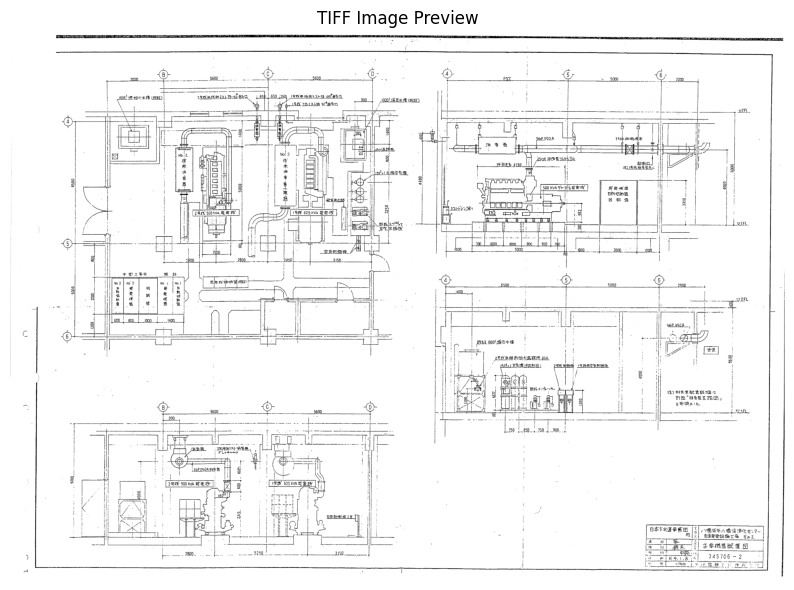

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# TIFF 画像のパス
tiff_image_path = "/content/No.2発電機施工図test_page1.tiff"  # 1ページ目

# 画像を開いて表示
img = Image.open(tiff_image_path)

plt.figure(figsize=(10, 8))
plt.imshow(img, cmap="gray")
plt.axis("off")  # 軸を非表示
plt.title("TIFF Image Preview")
plt.show()


✅ 画像のサイズ: 7017 x 4959
✅ AutoCAD 用座標データを CSV に保存しました: /content/No.2発電機施工図test_page1.csv


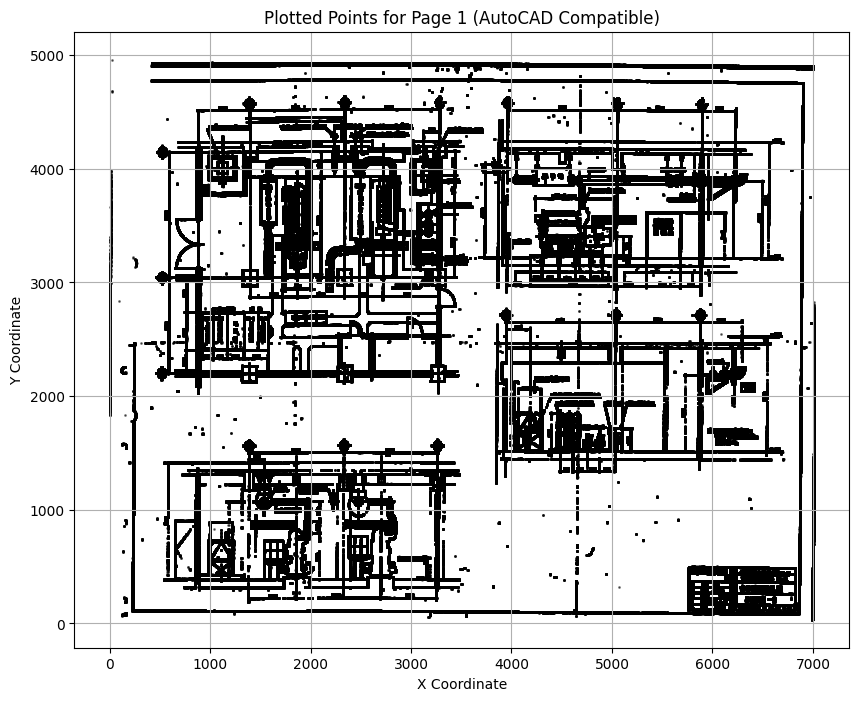

✅ TIFF から AutoCAD 用の CSV への変換とプロットが完了しました。


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# --- TIFFから座標データをCSVに保存 & 可視化 ---
for i in range(len(images)):
    tiff_file_path = f"/content/No.2発電機施工図test_page{i+1}.tiff"
    img = Image.open(tiff_file_path).convert("L")

    # 画像のサイズを取得
    img_width, img_height = img.size
    print(f"✅ 画像のサイズ: {img_width} x {img_height}")

    # 画像を numpy 配列に変換
    img_array = np.array(img)

    # 黒いピクセルを抽出（しきい値を調整可能）
    threshold = 50  # 0（完全な黒）～255（白）
    black_pixels = np.column_stack(np.where(img_array < threshold))

    # 座標データを DataFrame に変換（AutoCAD用にY軸を反転）
    df_pixels = pd.DataFrame(black_pixels, columns=["Y", "X"])
    df_pixels["Y"] = img_height - df_pixels["Y"]  # Y軸の値を反転（AutoCAD用）

    # CSVとして保存
    csv_output_path = f"/content/No.2発電機施工図test_page{i+1}.csv"
    df_pixels.to_csv(csv_output_path, index=False, header=["X", "Y"])

    print(f"✅ AutoCAD 用座標データを CSV に保存しました: {csv_output_path}")

    # --- プロット（座標データの可視化）---
    plt.figure(figsize=(10, 8))
    plt.scatter(df_pixels["X"], df_pixels["Y"], s=1, color="black", alpha=0.5)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(f"Plotted Points for Page {i+1} (AutoCAD Compatible)")
    plt.grid(True)
    plt.show()

print("✅ TIFF から AutoCAD 用の CSV への変換とプロットが完了しました。")
